In [1]:
import pyroc
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [2]:
# Load CSV
data = pd.read_csv("tests/data/ovarian_cancer.csv", index_col="idx")

# Imputation (Median)
outcome = data.pop("outcome")

data.albumin = data.albumin.fillna(np.median(data.albumin.dropna()))
data.total_protein = data.total_protein.fillna(np.median(data.total_protein.dropna()))

data.rename(columns={
    'albumin': 'Albumin',
    'total_protein': 'Total Protein',
    'total_score': 'Krebs-Goplerud'
}, inplace=True)

# Show examples
data.head(5)

,Albumin,Total Protein,Krebs-Goplerud
idx,,,
1,3.0,5.8,0
2,3.2,6.3,5
3,3.9,6.8,7
4,2.8,4.8,4
5,3.2,5.8,7


In [3]:
data.shape

(49, 3)

## Instantiate ROC object

In [4]:
roc = pyroc.ROC(outcome, data)

In [5]:
roc.preds['Krebs-Goplerud']

array([0., 5., 7., 4., 7., 5., 2., 5., 5., 4., 4., 6., 4., 5., 5., 6., 6.,
       4., 6., 4., 4., 3., 2., 5., 5., 4., 4., 5., 6., 5., 4., 4., 3., 4.,
       5., 3., 4., 5., 1., 3., 2., 2., 3., 3., 3., 4., 5., 3., 5.])

In [6]:
roc.preds['Albumin']

array([3. , 3.2, 3.9, 2.8, 3.2, 0.9, 2.5, 1.6, 3.8, 3.7, 3.5, 3.2, 3.8,
       4.1, 3.6, 4.3, 3.6, 2.3, 4.2, 4. , 3.5, 3.8, 3. , 4.5, 3.7, 3.1,
       4.1, 4.3, 4.3, 3.2, 2.6, 3.3, 1.7, 3.5, 3.7, 3.3, 4.2, 3.5, 2.9,
       2.1, 3.5, 2.8, 3.5, 3.5, 4. , 3.3, 3.7, 2. , 3.6])

## Plot ROC curves

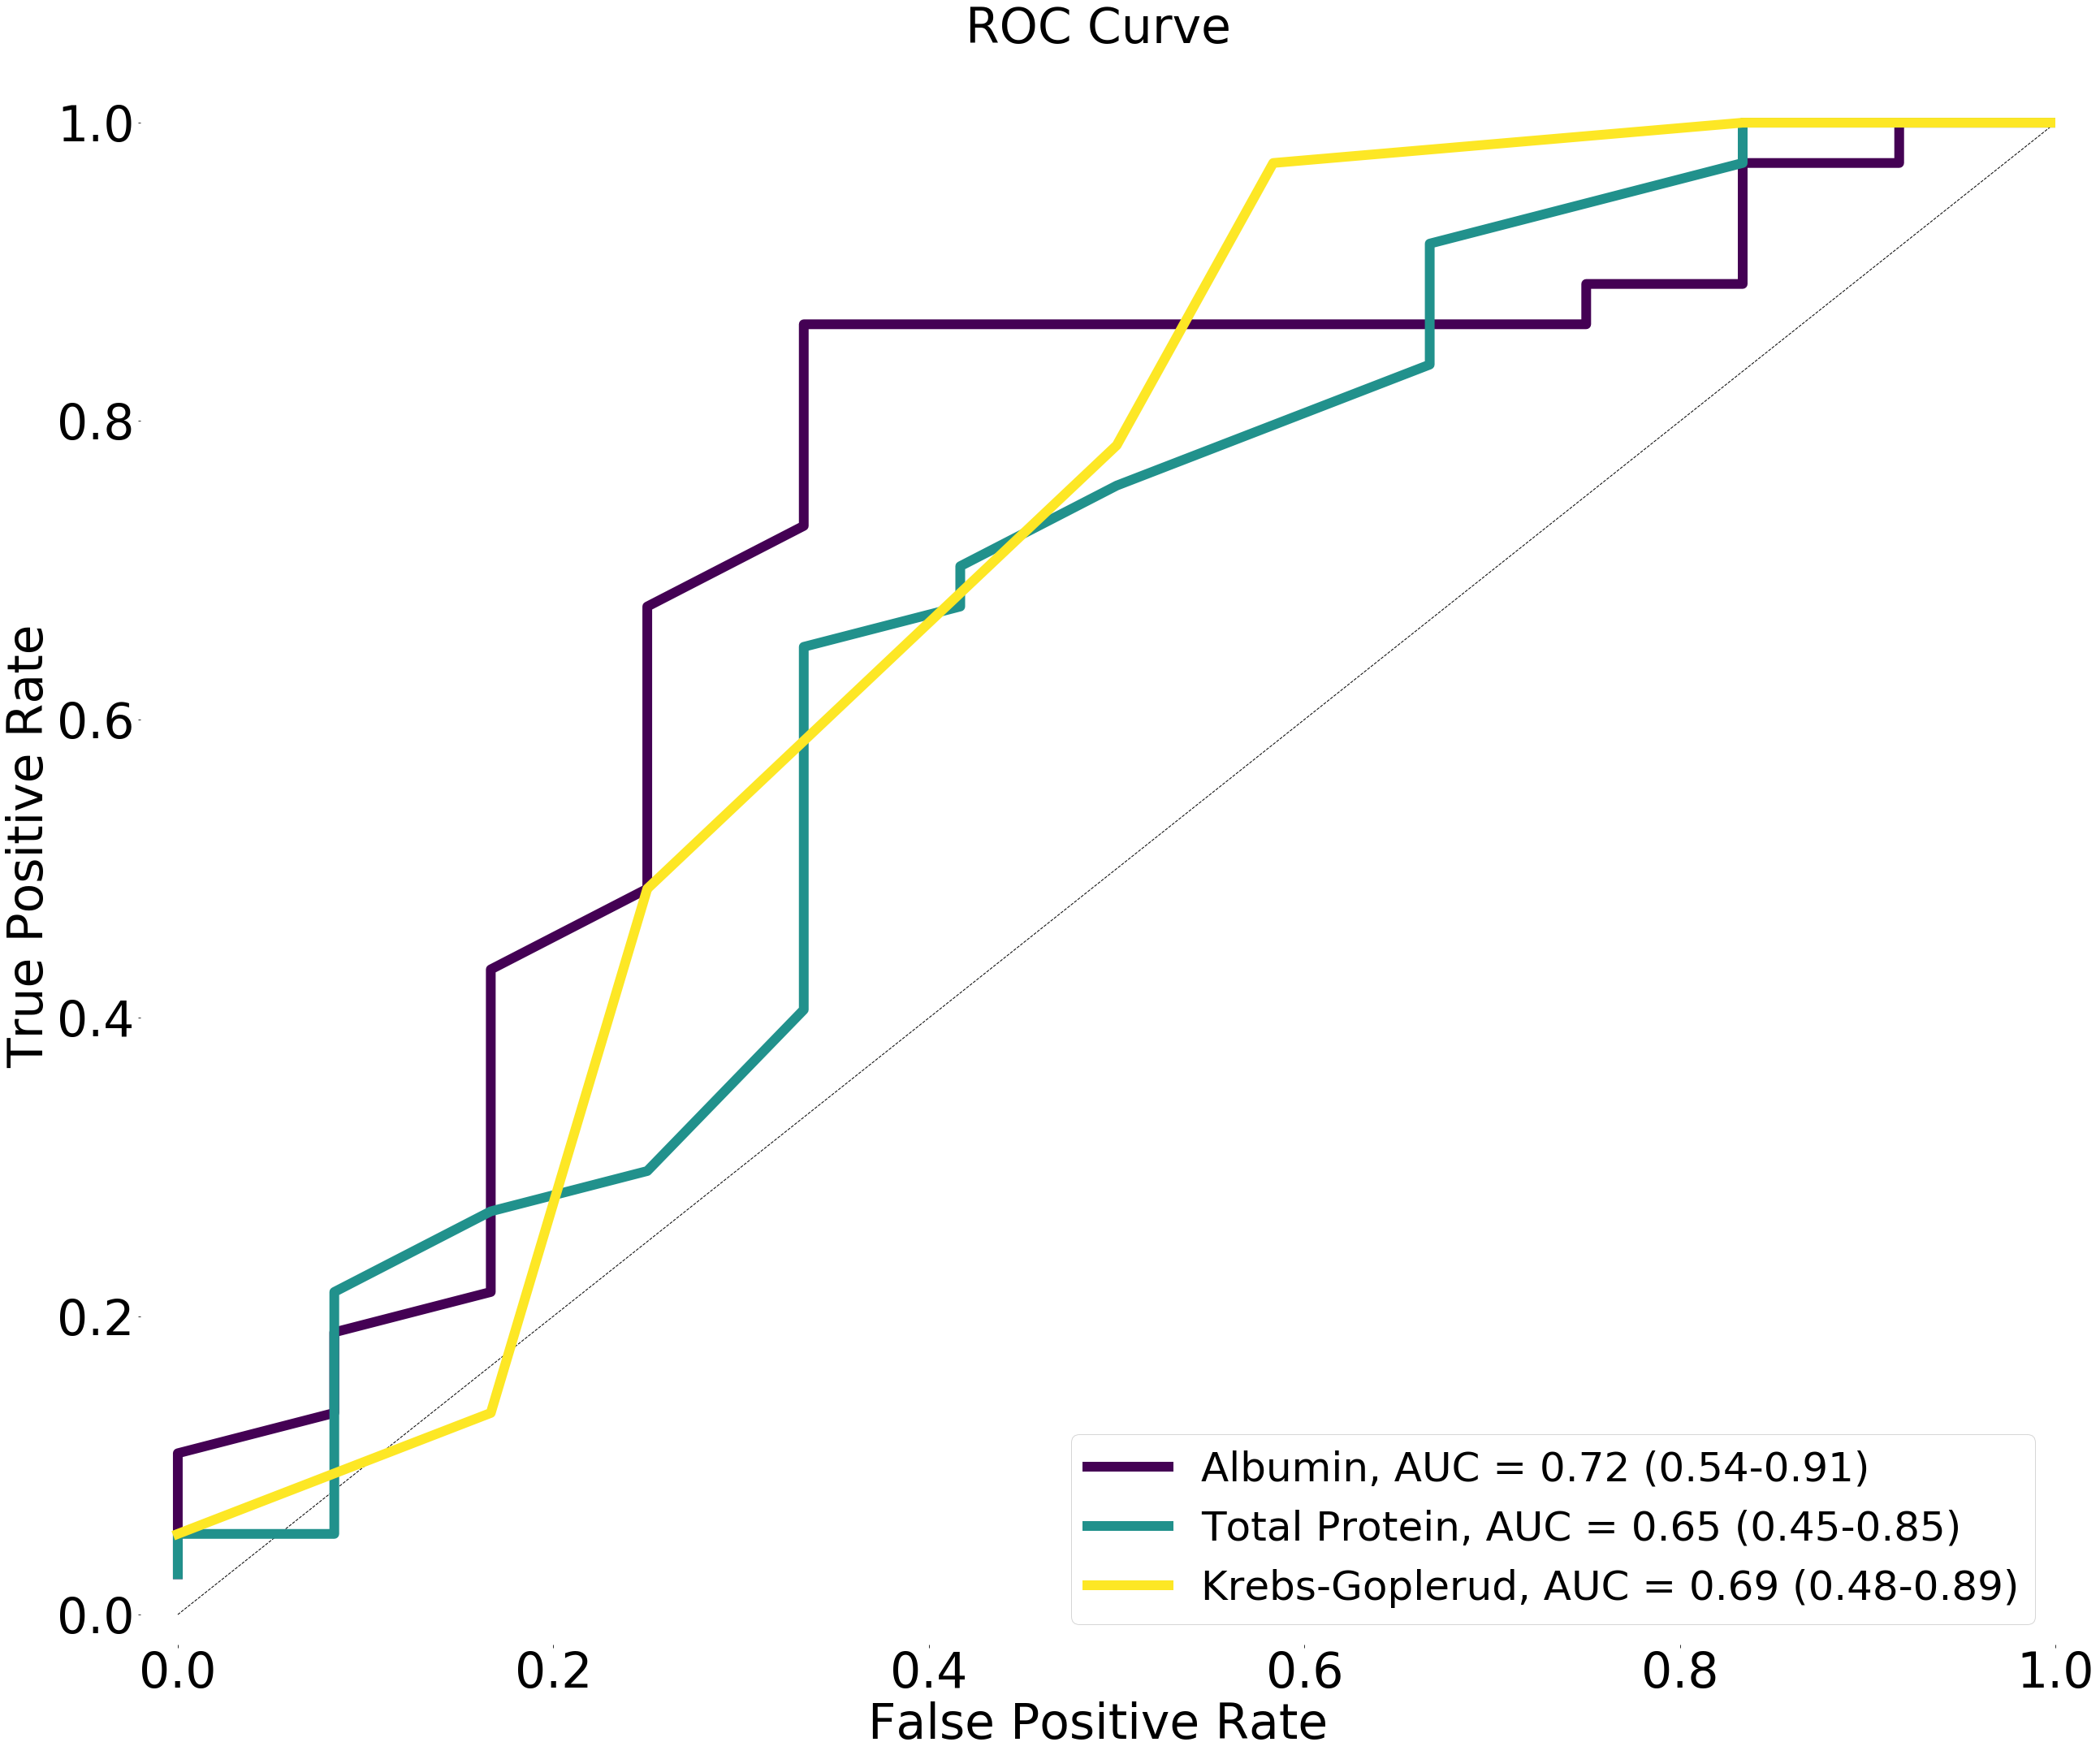

In [7]:
fig, ax = roc.plot()
plt.show()

## Compare Krebs-Goplerud with Albumin and Protein

In [8]:
p, ci = roc.compare(np.array([
    [1, -1,  0],
    [1,  0, -1]
]))
print(p, ci)

0.42291256338064165 [0.05063562 7.37775891]


## AUC and CI values

In [9]:
print(roc.auc)

[[0.72297297 0.6509009  0.68693694]]


In [10]:
print(roc.ci()[0], 'lower')
print(roc.ci()[1], 'upper')

[0.53737381 0.44915782 0.48093018] lower
[0.90857213 0.85264398 0.8929437 ] upper
